# Tutorial: Introduction to Altair

This tutorial is based off the [Altair Tutorial](https://github.com/altair-viz/altair_notebooks). 

## Review - The Grammar of Graphics

*The Grammar of Graphics*, Wilkinson (2005) uses the following specification:

* Data/Variables
* Geometry and Aesthetics

## Translating to Altair/Vege-Lite

Altair and Vega-Lite use different language.

* Geometry $\rightarrow$ **mark**
* *Data/Variables* and *Aethetics* $\rightarrow$ **encoding**


## Importing `altair`

In [16]:
import altair as alt

In [1]:
# Uncomment/run this line to enable Altair in the notebook (not JupyterLab):
# alt.renderers.enable('notebook')

## The data

Data is specified in two ways.

* A `pandas` data frame
    * Interactive
    * Use `pandas` tools
* A string of a `url` to a csv/JSON data set 
    * Best for posting to the web
    * see [Defining Data](https://altair-viz.github.io/user_guide/data.html).

## Small `pandas` Data Set

In [18]:
import pandas as pd
data = pd.DataFrame({'a': ['C', 'C', 'C', 'D', 'D', 'D', 'E', 'E', 'E'],
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


## The `Chart` object

* The fundamental object
* Takes a dataframe as an argument

In [10]:
chart = alt.Chart(data)

At this point the specification contains only the data, and no visualization specification.

## Specifying the Geometry - Chart Marks

* Use a `mark` method to specify a geometry
* **Example** We can map to points using `mark_point`

<img src="../images/1_1_point.png">

In [19]:
chart = alt.Chart(data).mark_point()
chart

<font color="red"> <b>Question:</b> </font> Why do we get exactly one point?

## Other Mark Types

Here are some commonly used `mark_*()` methods; see [Markings](https://altair-viz.github.io/documentation/marks.html) in the Altair documentation:

<table>
  <tr>
    <th>Method</th><th>Method</th>
  </tr>
  <tr>
    <td><code>mark_area()</code></td>
    <td><code>mark_point()</code></td>
  </tr>
  <tr>
    <td><code>mark_bar()</code></td>
    <td><code>mark_rule()</code></td>
  </tr>
  <tr>
    <td><code>mark_circle()</code></td>
    <td><code>mark_square()</code></td>
  </tr>
  <tr>
    <td><code>mark_line()</code></td>
    <td><code>mark_text()</code></td>
  </tr>
  <tr>
    <td><code>mark_tick()</code></td>
  </tr>
</table>



## Data encodings

To assign information to a mark, we use an **encoding**.  A visual encoding specifies 

* How data should be mapped onto the visual properties.
* Can include
    * Binning
    * Aggregation
    * Scaling

## Adding an Encoding to a Chart Object

Use the `encode()` method of the `Chart` object. 

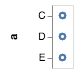

In [46]:
chart = alt.Chart(data).mark_point().encode(y='a')
chart

## Common encodings
Some of the more frequency used visual encodings are listed here:

* **X**: x-axis value
* **Y**: y-axis value
* **Color**: color of the mark
* **Shape**: shape of the mark
* **Size**: size of the mark

## Other encodings

Here are some other encodings

* **Opacity**: transparency/opacity of the mark
* **Row**: row within a grid of facet plots
* **Column**: column within a grid of facet plots

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/documentation/encoding.html) .

## Explicit Variable Types

* Altair guessed the data type (nominal).
* Explicitly specify with a colon

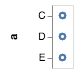

In [47]:
chart = alt.Chart(data).mark_point().encode(y='a:N')
chart

## Available data types

Altair supports four primitive data types:

<table>
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Numerical quantity (real-valued)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Name / Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

## Mapping 2 Dimension

Let's encode column `b` as the `x` position:

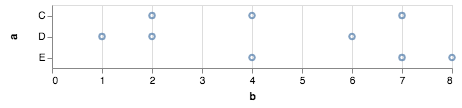

In [21]:
alt.Chart(data).mark_point().encode(
    y='a',
    x='b'
)

## Two Ways to Specify Variables

* First method: `y = 'a'`
    * Short and easy to read
* Second method: `alt.Y('a')`
    * Allows extra features.
    
You will see many example in the next notebook.

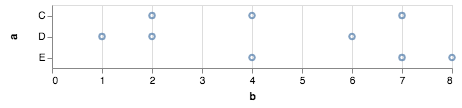

In [51]:
alt.Chart(data).mark_point().encode(
    y=alt.Y('a'),
    x=alt.X('b')
)

## Changing the mark type

A different mark type can be chosen using a different `mark_*()` method, such as `mark_bar()`:

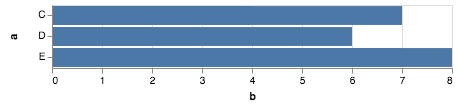

In [36]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a'),
    alt.X('b')
)

## Order Doesn't Matter

We can specify the `mark` and `encoding` in any order.

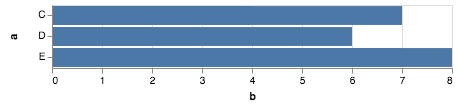

In [48]:
alt.Chart(data).encode(
    alt.Y('a'),
    alt.X('b')
).mark_bar()

## More than one encoding call

We can also split the `encode` into multiple parts

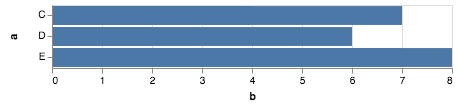

In [49]:
alt.Chart(data).mark_bar().encode(y = 'a').encode(x = "b")

## Under-the-hood Details

To make a visualization

* Altair creates a JSON specification
* Vega-lite renders this in the browser

In [42]:
chart = alt.Chart(data).mark_point().encode(y='a', x='b')
chart.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'mark': 'point',
 'encoding': {'x': {'type': 'quantitative', 'field': 'b'},
  'y': {'type': 'nominal', 'field': 'a'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json'}

## Publishing a visualization online

Because Altair produces Vega-Lite specifications, it is easy to export and post charts on the web.

* Light-weight specification.
* Vega-lite does all the work (in JavaScript).
* No server needed.

Use the ``savechart()`` method to save any chart to HTML.

In [43]:
chart.savechart('chart.html')

In [40]:
!cat chart.html


<!DOCTYPE html>
<html>
<head>
  <style>
    .vega-actions a {
        margin-right: 12px;
        color: #757575;
        font-weight: normal;
        font-size: 13px;
    }
    .error {
        color: red;
    }
  </style>

<script src="https://cdn.jsdelivr.net/npm//vega@3.3.1"></script>
<script src="https://cdn.jsdelivr.net/npm//vega-lite@2.4.3"></script>
<script src="https://cdn.jsdelivr.net/npm//vega-embed@3.11"></script>

</head>
<body>
  <div id="vis"></div>
  <script type="text/javascript">
    var spec = {"config": {"view": {"width": 400, "height": 300}}, "data": {"values": [{"a": "C", "b": 2}, {"a": "C", "b": 7}, {"a": "C", "b": 4}, {"a": "D", "b": 1}, {"a": "D", "b": 2}, {"a": "D", "b": 6}, {"a": "E", "b": 8}, {"a": "E", "b": 4}, {"a": "E", "b": 7}]}, "mark": "point", "encoding": {"x": {"type": "quantitative", "field": "b"}, "y": {"type": "nominal", "field": "a"}}, "$schema": "https://vega.github.io/schema/vega-lite/v2.4.3.json"};
    var embed_opt = {"mode": "vega-lite"};



## View the Resulting Page in a Notebook

In [44]:
# Display IFrame in IPython
from IPython.display import IFrame
IFrame('chart.html', width=400, height=200)

Alternatively, you can use your web browser to open the file manually to confirm that it works: [chart.html](chart.html).

## Customizing your visualization

For fast data exploration, Altair (via Vega-Lite) has

* many default properties, but
* provides an API to customize the visualization. 

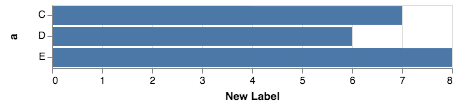

In [54]:
alt.Chart(data).mark_bar().encode(
    y='a',
    x=alt.X('b', axis=alt.Axis(title='New Label'))
)

## Changing Mark Properties

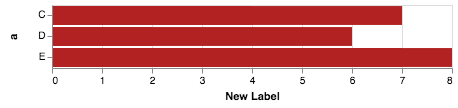

In [55]:
alt.Chart(data).mark_bar(color='firebrick').encode(
    y='a',
    x=alt.X('b', axis=alt.Axis(title='New Label'))
)

## Changing Other Properties

Set other properties using the ``properties()`` method.

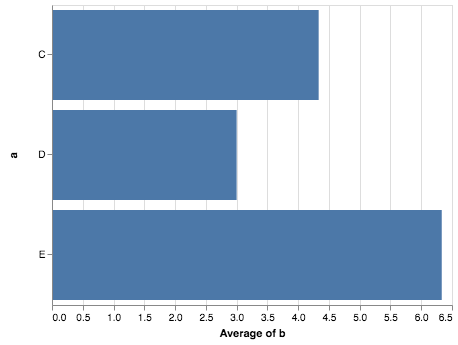

In [56]:
chart = alt.Chart(data).mark_bar().encode(
    y='a',
    x=alt.X('average(b)', axis=alt.Axis(title='Average of b'))
).properties(
    width=400,
    height=300
)

chart

## Learning More

For more information on Altair, please refer to Altair's online documentation: http://altair-viz.github.io/